## 실습 문제: 함수를 이용한 파일 통계 분석

**설명**: 이 문제는 텍스트 파일에서 숫자 데이터를 읽어와 합계, 평균, 최소값, 최대값, 중앙값과 같은 기본 통계치를 계산하는 일련의 함수를 구현하는 것입니다. 클래스 대신 각 기능별로 독립된 함수를 작성하여 데이터 처리 파이프라인을 구성하는 연습을 합니다. 각 함수는 명확한 단일 책임을 가집니다.

**요구사항**:
- `read_data(filepath: str) -> list[float]`: 파일 경로를 입력받아 각 줄의 숫자를 읽어 float 리스트로 반환합니다. **파일이 존재하지 않거나(`FileNotFoundError`) 숫자로 변환할 수 없는 값이 있을 경우(`ValueError`)에 대한 예외 처리**를 포함해야 합니다.
- `calculate_*` 함수들: `calculate_sum`, `calculate_average`, `find_minimum`, `find_maximum`, `calculate_median` 함수를 구현합니다.
      - 특히 `calculate_average` 함수는 평균을 계산할 때 **0으로 나누는 오류(`ZeroDivisionError`)가 발생하지 않도록**, 데이터 리스트가 비어있는 경우를 먼저 확인하고 `ValueError`를 발생시켜야 합니다.
      - `find_minimum`, `find_maximum` 함수 또한 **데이터가 비어있을 경우 `ValueError`를 발생**시켜야 합니다.
- `save_to_file(stats: dict, output_filename: str)`: 계산된 통계치가 담긴 딕셔너리와 출력 파일명을 입력받아, 제공된 형식에 맞게 파일에 저장합니다.

**다운로드**

- Numbers.txt: https://drive.google.com/file/d/1ZH8Y-Q3cuw4Ac5GWh91HfvWacukFNwJ-/view?usp=sharing
- Empty_Numbers.txt: https://drive.google.com/file/d/17PCtGel9Mijio8yNHaygviY_FnhzwDbN/view?usp=sharing
- Error_Numbers.txt: https://drive.google.com/file/d/1q050TjAowpZrG1c-C2UC3KYxbKXAEiHV/view?usp=sharing



In [38]:
def read_data(filepath: str) -> list[float]:
    """
    지정된 파일 경로에서 숫자 데이터를 읽어와 부동소수점 리스트로 반환합니다.
    파일의 데이터에 숫자가 아닌 값이 포함된 경우 예외를 처리합니다.
    """
    lst = []
    try :
        with open(filepath, 'r') as f :
            try :
                tmp = f.readline()
                while tmp != "" :
                    lst.append(float(tmp))
                    tmp = f.readline()
            except ValueError as e :
                # print(f"{e} Detected!")
                raise ValueError
    except FileNotFoundError as e:
        raise FileNotFoundError

    
    return lst
    pass

def calculate_sum(data: list[float]) -> float:
    """
    숫자 데이터 리스트의 합계를 계산하여 반환합니다. 데이터가 비어있을 경우 ValueError를 발생시킵니다.
    """
    return sum(data)
    pass

def calculate_average(data: list[float]) -> float:
    """
    숫자 데이터 리스트의 평균을 계산합니다.
    데이터가 비어있을 경우 0으로 나누기 오류를 방지하기 위해 ValueError를 발생시킵니다.
    """
    return calculate_sum(data) / len(data)
    pass

def find_minimum(data: list[float]) -> float:
    """
    숫자 데이터 리스트에서 최소값을 찾아 반환합니다. 데이터가 비어있을 경우 ValueError를 발생시킵니다.
    """
    return min(data)
    pass

def find_maximum(data: list[float]) -> float:
    """
    숫자 데이터 리스트에서 최대값을 찾아 반환합니다. 데이터가 비어있을 경우 ValueError를 발생시킵니다.
    """
    return max(data)
    pass

def calculate_median(data: list[float]) -> float:
    """
    숫자 데이터 리스트의 중앙값을 계산하여 반환합니다.
    데이터를 정렬한 후, 개수가 홀수이면 중앙의 값을,
    짝수이면 중앙의 두 값의 평균을 반환합니다.
    """
    data.sort()
    if len(data) % 2 == 1 : return data[len(data)//2]
    return (data[len(data) // 2] + data[len(data) // 2 - 1]) / 2
    pass

def save_to_file(stats: dict[str, float], output_filename: str) -> None:
    """
    계산된 통계치 딕셔너리를 지정된 파일에 저장합니다.
    예시:
    합계: 7.4
    평균: 2.5
    ...
    """
    with open(output_filename, 'w') as f :
        for k, v in stats.items() :
            f.write(f"{k}: {v}\n")
    pass


In [39]:

input_filenames = ['Numbers.txt', 'Empty_Numbers.txt', 'Not_Exist.txt', 'Error_Numbers.txt']
output_filename = 'statistics.txt'


for input_filename in input_filenames:
    try:
        print('-'*10 + f'입력 파일: {input_filename}' + '-'*10)
        # 1. 파일에서 데이터 읽기
        numbers = read_data(input_filename)

        # 2. 통계치 계산 (데이터가 있을 경우에만)
        if numbers:
            stats = {
                '합계': calculate_sum(numbers),
                '평균': calculate_average(numbers),
                '최소값': find_minimum(numbers),
                '최대값': find_maximum(numbers),
                '중앙값': calculate_median(numbers)
            }

            # 3. 결과 파일에 저장
            save_to_file(stats, output_filename)
            print(f"통계치가 '{output_filename}' 파일에 성공적으로 저장되었습니다.")

            # 4. (확인용) 콘솔에 결과 출력
            for key, value in stats.items():
                print(f"{key}: {value}")

        else:
            print(f"오류: {input_filename}' 파일에 처리할 데이터가 없습니다.")

    except FileNotFoundError as e:
        print(f"오류: '{input_filename}' 파일을 찾을 수 없습니다.")
    except ValueError as e:
        print(f"오류: 데이터 처리 중 오류가 발생했습니다: {e}")
    except Exception as e:
        print(f"오류: 예상치 못한 오류가 발생했습니다: {e}")

----------입력 파일: Numbers.txt----------
통계치가 'statistics.txt' 파일에 성공적으로 저장되었습니다.
합계: 5050.0
평균: 50.5
최소값: 1.0
최대값: 100.0
중앙값: 50.5
----------입력 파일: Empty_Numbers.txt----------
오류: Empty_Numbers.txt' 파일에 처리할 데이터가 없습니다.
----------입력 파일: Not_Exist.txt----------
오류: 'Not_Exist.txt' 파일을 찾을 수 없습니다.
----------입력 파일: Error_Numbers.txt----------
오류: 데이터 처리 중 오류가 발생했습니다: 



## 실습 문제: 함수를 이용한 날씨 데이터 처리

**설명**: 이 문제는 CSV 파일에서 날씨 데이터를 읽어오는 **함수를 구현**하고, 그 함수를 호출하여 얻은 데이터로 일일 최고 및 최저 기온 변화를 시각화하는 방법을 연습합니다.

**요구사항**:
-   `read_weather_data` 함수를 구현합니다.
    -   이 함수는 파일 경로(`filepath`)를 인자로 받습니다.
    -   `csv` 모듈을 사용하여 파일을 열고 헤더를 기반으로 'DATE', 'TMAX', 'TMIN' 열의 인덱스를 동적으로 찾습니다.
    -   파일의 각 행을 반복하며 날짜, 최고 기온, 최저 기온을 추출합니다.
    -   데이터가 누락된 경우는 해당 날짜는 생략하고, 최종적으로 날짜, 최고 기온, 최저 기온이 담긴 세 개의 리스트를 **반환(return)**합니다.

**다운로드**

- sitka_weather_2021_full.csv: https://raw.githubusercontent.com/ehmatthes/pcc_3e/refs/heads/main/chapter_16/the_csv_file_format/weather_data/sitka_weather_2021_full.csv
- ref: Eric Matthes, Python Crash Course, 3rd edition, No Starch Press

In [65]:
a = ""
try :
    print("예외 전")
    b = int(a)
    print("예외 후")
except ValueError :
    print(f"병신 ")

예외 전
병신 


ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

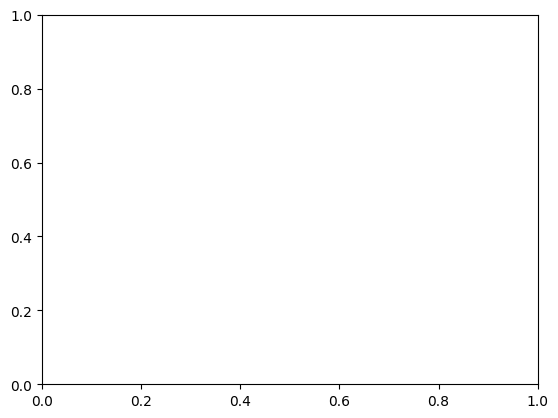

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [4,5,] # 오류발생
y = [4,5,6] # 길이 같아아 함.
plt.plot(x, y)

In [71]:
import csv
import datetime as dt

def read_weather_data(filepath: str) -> tuple[list, list, list]:
    """
    csv 파일로부터 일자별 온도 데이터를 읽습니다.

    Args:
        filepath: csv 파일 경로

    Returns:
        날짜, 최고 온도, 최저 온도의 리스트로 구성된 tuple
    """
    dates, highs, lows = [], [], []
    with open(filepath, 'r') as f :
        filereader = csv.reader(f)
        next(filereader)
        for row in filereader:
            # 나의 시행착오
            # try :
            #     print(row[2] + ' ' + row[7] + ' ' + row[8])
            #     dates.append(dt.datetime.strptime(row[2], '%Y-%m-%d'))
            #     highs.append(int(row[7]) if row[7] != '' else 0)
            #     lows.append(int(row[8]) if row[8] != '' else 0)
            # 문제 발생 이유ㅜ : append 뒤에 삼항 연산자는 사실 원래 없었음.
            # dates에서 valueError 발생 안하고 highs에서만 발생하면, dates에는 값이 들어가고 highs랑 lows에는 안들어가서
            # 표를 만들 때, 크기가 같지 않아서 오류가 발생함.
            # except ValueError as e:
            #     print(f"올바론 포맷이 아닙니다. + {e}")
            try :
                date = dt.datetime.strptime(row[2], '%Y-%m-%d')
                high = int(row[7])
                low = int(row[8])
            except ValueError as e:
                print(f"{e}에서 ValueError 발생")
            else : # 예외가 발생하지 않을 때만 append, 예외가 발생한 row는 갖다버림.
                dates.append(date)
                highs.append(high)
                lows.append(low)


    # 날씨 데이터 파일을 csv 모듈을 이용하여 읽습니다.
    # reader 객체를 반복하면서 각 행에서 날짜, 최고, 최저 기온을 추출합니다.
    # 'DATE'는 인덱스 2, 'TMAX'는 인덱스 7, 'TMIN'은 인덱스 8에 있습니다.
    # 추출한 기온은 정수(int)로 변환해야 합니다.
    # 날짜는 datetime.strptime()과 '%Y-%m-%d' 포맷을 사용하여 datetime 객체로 변환합니다.

    return dates, highs, lows

invalid literal for int() with base 10: ''에서 ValueError 발생


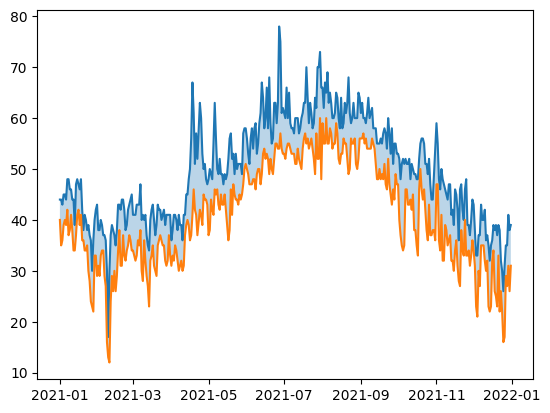

In [72]:
import matplotlib.pyplot as plt

dates, highs, lows = read_weather_data('sitka_weather_2021_full.csv')
plt.plot(dates, highs)
plt.plot(dates, lows)
plt.fill_between(dates, highs, lows, alpha=0.3)

## 실습 문제: 지진 데이터 시각화하기

**설명**: 실제 공공 데이터인 USGS(미국 지질조사국)의 한 달간 지진 데이터를 GeoJSON 형식으로 제공합니다. 이 데이터를 읽고 지진의 위치와 규모를 추출한 후, 시각화하는 프로그램을 작성하는 것이 목표입니다. 이 실습을 통해 파일 입출력, JSON 데이터 파싱, 그리고 데이터 시각화 라이브러리 활용법을 익힐 수 있습니다.

**요구사항**:

  - `get_earthquake_data` 함수를 완성하여 GeoJSON 파일에서 지진의 **규모(magnitude)**, **위치(longitude, latitude)**, 그리고 \*\*상세 정보(place)\*\*를 추출하세요.

**다운로드**

- eq_data_1_day_m1.geojson: https://raw.githubusercontent.com/ehmatthes/pcc_3e/refs/heads/main/chapter_16/mapping_global_datasets/eq_data/eq_data_1_day_m1.geojson
- ref: Eric Matthes, Python Crash Course, 3rd edition, No Starch Press


In [12]:
pip install jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 9.8 MB/s  0:00:016m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.8 MB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 8.6 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61/61 [jupyter]8/61 [jupyterlab]]p4]
Note: you may need to restart the kernel to use updated packages.


In [13]:
import json

def get_earthquake_data(filepath: str) -> dict:
    """
    지진 데이터 geojson 파일을 읽어와서 시각화에 필요한 데이터를 추출합니다.

    Args:
        filepath: geojson 파일의 경로

    Returns:
        규모(mags), 경도(lons), 위도(lats), 상세 정보(hover_texts) 리스트를
        포함한 딕셔너리를 반환합니다.
    """
    mags, lons, lats, hover_texts = [], [], [], []

    # TODO: all_eq_dicts를 순회하며 각 지진 이벤트에서
    # 규모, 경도, 위도, 장소 정보를 추출하여 각각의 리스트에 추가하세요.
    # - 규모: feature['properties']['mag']
    # - 경도: feature['geometry']['coordinates'][0]
    # - 위도: feature['geometry']['coordinates'][1]
    # - 장소: feature['properties']['place']
    with open(filepath, 'r', encoding='utf-8') as f :
        contents = json.load(f)
    
    data = contents['features']
        
    for feature in data :
        mag = feature['properties']['mag']
        lon = feature['geometry']['coordinates'][0]
        lat = feature['geometry']['coordinates'][1]
        hover_text = feature['properties']['place']

        mags.append(mag)
        lons.append(lon)
        lats.append(lat)
        hover_texts.append(hover_text)

    return {'mags': mags, 'lons': lons, 'lats': lats, 'hover_texts': hover_texts}


In [14]:
import plotly.express as px

filepath = 'eq_data_1_day_m1.geojson'
eq_data = get_earthquake_data(filepath)

fig = px.scatter_geo(
    lat=eq_data['lats'],
    lon=eq_data['lons'],
    size=eq_data['mags'],
    hover_name=eq_data['hover_texts'],
    color=eq_data['mags'],
    projection="natural earth"
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed